In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv', header = 0)

In [3]:
dev = pd.read_csv('dev.csv', header = 0)

In [4]:
# load the data into dataframes
train_X = data.loc[:, data.columns != 'label']
train_y = pd.DataFrame(data['label'])

In [5]:
val_X = dev.loc[:, data.columns != 'label']
val_y = pd.DataFrame(dev['label'])

In [6]:
train_X['text length'] = train_X['review'].apply(len)
train_X['word length'] = train_X['review'].apply(lambda x: len(x.split(" "))) 

val_X['text length'] = val_X['review'].apply(len)
val_X['word length'] = val_X['review'].apply(lambda x: len(x.split(" "))) 

In [7]:
train_X[0:5]

,ex_id,user_id,prod_id,rating,date,review,text length,word length
0,0,923,0,3.0,2014-12-08,The food at snack is a selection of popular Gr...,215,40
1,1,924,0,3.0,2013-05-16,This little place in Soho is wonderful. I had ...,269,52
2,2,925,0,4.0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,178,32
3,3,926,0,4.0,2011-07-28,This is a beautiful quaint little restaurant o...,491,90
4,4,927,0,4.0,2010-11-01,Snack is great place for a casual sit down lu...,596,102


In [8]:
#Functions for cleaning HTML tags and punctuation 
import re
def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def clean_punc(word):
    cleaned = re.sub(r'[?|!|\'|#]', r'', word)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

In [9]:
#Getting Stopwords 
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english') # list of stop words
sno = SnowballStemmer('english') # object with methods to get root words
print (stop)
print('***************************************')
print(sno.stem('tastful'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haha_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [10]:
final_string = []
s = ''
for sentence in train_X['review'].values:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = b' '.join(filtered_sentence)
    final_string.append(strl)

train_X['cleaned review'] = final_string

In [11]:
train_X['review'][5]

"A solid 4 stars for this greek food spot. \xa0If you're a fan of lamb like I am, you must come here and try the lamb sandwich. \xa0Amazingly tender and juicy with onions and arugula. \xa0Also had a good greek salad."

In [12]:
train_X['cleaned review'][5]
# The b denotes a byte string.

b'solid star greek food spot your fan lamb like must come tri lamb sandwich amaz tender juici onion arugula also good greek salad'

# upsampling fake review cases

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
# ros random over sampler
ros = RandomOverSampler()
train_X_ros, train_y_ros = ros.fit_sample(train_X, train_y)

In [15]:
print('pre-upsampling genuine cases: ',train_y[train_y['label'] == 0].shape[0])
print('post-upsampling genuine cases: ',train_y_ros[train_y_ros['label'] == 0].shape[0])
print('pre-upsampling fake cases: ',train_y[train_y['label'] == 1].shape[0])
print('post-upsampling fake cases: ',train_y_ros[train_y_ros['label'] == 1].shape[0])

pre-upsampling genuine cases:  225055
post-upsampling genuine cases:  225055
pre-upsampling fake cases:  25819
post-upsampling fake cases:  225055


In [16]:
train_X_ros.head()

,ex_id,user_id,prod_id,rating,date,review,text length,word length,cleaned review
0,0,923,0,3.0,2014-12-08,The food at snack is a selection of popular Gr...,215,40,b'the food snack select popular greek dish the...
1,1,924,0,3.0,2013-05-16,This little place in Soho is wonderful. I had ...,269,52,b'this littl place soho wonder lamb sandwich g...
2,2,925,0,4.0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,178,32,b'order lunch snack last friday time noth miss...
3,3,926,0,4.0,2011-07-28,This is a beautiful quaint little restaurant o...,491,90,b'this beauti quaint littl restaur pretti stre...
4,4,927,0,4.0,2010-11-01,Snack is great place for a casual sit down lu...,596,102,b'snack great place casual sit especi cold win...


# bag of words - ngram

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(binary = False, ngram_range = (1,3))
#BoW_data = count_vect.fit_transform(train_X['cleaned review'].values)

In [18]:
BoW_mod = count_vect.fit(train_X_ros['cleaned review'])

In [19]:
BoW_train_X = BoW_mod.transform(train_X_ros['cleaned review'])

In [20]:
val_final_string = []
s = ''
for sentence in val_X['review'].values:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = b' '.join(filtered_sentence)
    val_final_string.append(strl)

val_X['cleaned review'] = val_final_string

In [21]:
BoW_val_X = BoW_mod.transform(val_X['cleaned review'])

In [22]:
import numpy as np
from scipy.sparse import hstack

In [23]:
train_extra = np.array(train_X_ros[['text length','word length','rating']])
train_extra_min = train_extra.min(axis = 0)
train_extra_max = train_extra.max(axis = 0)
train_extra = (train_extra - train_extra_min)/(train_extra_max-train_extra_min)

In [24]:
BoW_train_X = hstack((BoW_train_X, train_extra))

In [25]:
val_extra = np.array(val_X[['text length','word length','rating']])
val_extra_min = val_extra.min(axis = 0)
val_extra_max = val_extra.max(axis = 0)
val_extra = (val_extra - val_extra_min)/(val_extra_max-val_extra_min)

In [26]:
BoW_val_X = hstack((BoW_val_X, val_extra))

# Naive Bayes

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import naive_bayes
from sklearn.metrics import roc_curve, auc

In [28]:
nb_bernoulli = naive_bayes.BernoulliNB()

In [29]:
train_y_ros_arr = np.array(train_y_ros['label'])

In [30]:
nb_bernoulli.fit(BoW_train_X,train_y_ros_arr)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [31]:
preds_nb = nb_bernoulli.predict_proba(BoW_val_X)[:,1]

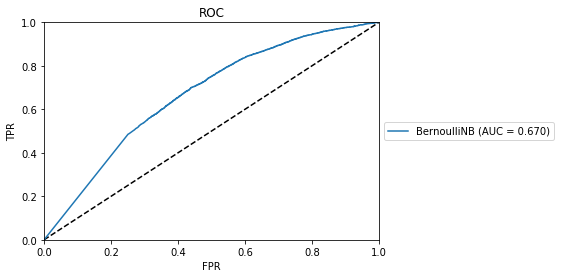

In [32]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

nb_fpr, nb_tpr, nb_thresholds = roc_curve(val_y, preds_nb)
nb_roc_auc = auc(nb_fpr, nb_tpr)
nb_curve = plt.plot(nb_fpr, nb_tpr, label = 'BernoulliNB' + ' (AUC = %0.3f)' % nb_roc_auc)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [33]:
pred_y = nb_bernoulli.predict(BoW_val_X)

In [34]:
val_y_arr = np.array(val_y['label'])

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(val_y_arr, pred_y)

array([[15775, 16495],
       [  868,  2780]], dtype=int64)

# Logistic Reg

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score as ap

In [38]:
def logreg_iter(lambda_set, result_dict):
    for i in lambda_set:
        C_input = 1/i
        clf = LogisticRegression(C = C_input, max_iter = 2000, solver = 'liblinear', penalty = 'l1')
        clf.fit(BoW_train_X, train_y_ros_arr)
        preds = clf.predict_proba(BoW_val_X)[:,1]
        fpr, tpr, thresholds = roc_curve(val_y, preds)
        roc_auc = auc(fpr, tpr)
        avep = ap(y_true = val_y_arr, y_score = preds)

        result_dict[i] = [clf, preds, roc_auc, avep]
        print('lambda={} finished, auc = {}, ap = {}'.format(i,roc_auc,avep))

In [39]:
result_dict_l1 = {}

In [40]:
logreg_iter([30,40,50],result_dict_l1)

lambda=30 finished, auc = 0.7226737320184953, ap = 0.21002743035848395
lambda=40 finished, auc = 0.7235693711638097, ap = 0.21120683569483745
lambda=50 finished, auc = 0.7236225265237388, ap = 0.21175002374865934


In [41]:
logreg_iter([60,70,80,90,100],result_dict_l1)

lambda=60 finished, auc = 0.7232995678934321, ap = 0.211389746214928
lambda=70 finished, auc = 0.7227953331335389, ap = 0.21073035289328435
lambda=80 finished, auc = 0.7221373279660649, ap = 0.2100379152611036
lambda=90 finished, auc = 0.7215543476709669, ap = 0.20961156455816077
lambda=100 finished, auc = 0.7210259413446849, ap = 0.20937612061042488


In [43]:
logreg_iter(np.arange(45,56,1),result_dict_l1)

lambda=45 finished, auc = 0.7236551842594556, ap = 0.2116746456187849
lambda=46 finished, auc = 0.7236633391368877, ap = 0.21162904261501903
lambda=47 finished, auc = 0.723662982361, ap = 0.21166729868551648
lambda=48 finished, auc = 0.7236403823074496, ap = 0.21168984363919185
lambda=49 finished, auc = 0.7236271561156145, ap = 0.21163653234686397
lambda=50 finished, auc = 0.7236231721182023, ap = 0.21175181984470137
lambda=51 finished, auc = 0.7236062507475305, ap = 0.21174335455151705
lambda=52 finished, auc = 0.7235701484255651, ap = 0.21173887630413074
lambda=53 finished, auc = 0.7235416573225363, ap = 0.21172057882734663
lambda=54 finished, auc = 0.7235295439316838, ap = 0.21166618174049115
lambda=55 finished, auc = 0.7234863655546132, ap = 0.21161023274429885


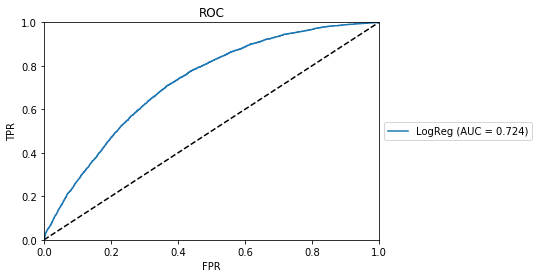

In [44]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

fpr, tpr, nb_thresholds = roc_curve(val_y, result_dict_l1[46][1])
curve = plt.plot(fpr, tpr, label = 'LogReg' + ' (AUC = %0.3f)' % result_dict_l1[46][2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [45]:
lambda_set = [46]
for i in lambda_set:
    print(i)
    print(result_dict_l1[i][2])
    lr_pred_y = result_dict_l1[i][0].predict(BoW_val_X)
    print(confusion_matrix(val_y_arr, lr_pred_y))
    print('---')

46
0.7236633391368877
[[19369 12901]
 [  956  2692]]
---
